<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating data using sklearn

In [6]:
data = datasets.make_regression(n_samples=1000,
                                n_features=3,
                                n_informative=3,
                                random_state=42)

In [7]:
type(data)

tuple

In [8]:
data

(array([[-0.5391227 , -0.60787526, -0.83726243],
        [-1.4066611 , -0.6115178 , -0.75538293],
        [ 0.68189149,  1.04416088, -0.48943944],
        ...,
        [ 0.6404798 , -0.46649538,  0.99657051],
        [-1.13883312,  0.62220714,  0.30047436],
        [-0.95643638, -1.29327296,  0.71975794]]),
 array([-1.42338105e+02, -1.58520012e+02,  8.03345971e+01, -1.68176389e+02,
         1.81493775e+02,  1.04678329e+02,  2.02397931e+02, -1.18139772e+02,
        -9.77690126e+01,  2.89617852e+01, -3.73589172e+01,  1.20328037e+02,
         3.60634016e+01, -1.38066226e+02,  2.01625663e+02,  1.77481385e+02,
         1.78713265e+02,  1.33321395e+02,  2.77336225e+01, -2.84102770e+01,
         4.13132572e+01,  2.28608309e+02, -3.14158826e+01, -1.33728801e+01,
        -9.93324279e+01, -4.97151414e+01, -1.08320706e+02, -8.85686626e+01,
         1.96209329e+02,  3.21662512e+01,  6.22223526e+00, -9.89209172e+01,
        -1.22413703e+02, -1.82923988e+02, -1.20697452e+02,  9.07472329e+01,
       

In [9]:
len(data)

2

In [10]:
X = data[0]

In [11]:
y = data[1]

In [12]:
X.shape

(1000, 3)

## Transforming Data features
 Data frames with columns -
 - Research,
 - Salaries,
 - Infrastructure
 - Expenditures

In [13]:
Research = X[:,0]

In [14]:
Salaries = X[:,1]

In [15]:
Infrastructure = X[:,2]

In [16]:
# scale feature x (years of experience) to range 0 to 2000
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))

In [17]:
Research

array([ 721.85725078,  469.3812216 , 1077.20384662,  883.30118835,
       1258.68382597,  632.07253378,  678.18443513,  987.61595201,
        789.13110933,  561.42161938,  968.21912167, 1286.65716066,
       1086.54839437,  774.09434828,  423.5212309 , 1416.74866013,
       1117.53730937,  856.65214553,  932.1130991 ,   49.75654065,
       1144.63252014,  809.91216603,  985.44538759,  638.01032823,
        414.65616234,  824.29204682, 1146.27515933, 1036.88766915,
       1193.57784574,  431.86479088,  235.25849443,  168.99720889,
        667.14019407,  708.61702536,  949.67510909,  819.50871959,
       1388.71170602, 1010.40770109, 1184.04456854,  564.14053841,
        965.06697712,  619.88422872, 1013.58475197,  567.09853666,
        984.58209938, 1131.70223536,  446.41949899, 1287.00514541,
        670.45124859, 1217.26647748, 1159.5525403 , 1288.9122749 ,
        786.77050433, 1281.61491381, 1076.03503762,  806.86500587,
        738.26504534,  666.02873758,  632.44425332, 1074.13311

In [18]:
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))

In [19]:
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))

In [20]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [21]:
Expenditures = y

In [22]:
Expenditures

array([10160.32984503,  9906.53189186, 13652.74125895,  9755.08072722,
       15239.32759604, 14034.54974528, 15567.18957247, 10539.85788833,
       10859.35404442, 12847.00713512, 11806.82944175, 14280.00066161,
       12958.38929348, 10227.33024542, 15555.07728417, 15176.3970406 ,
       15195.7179232 , 14483.78923036, 12827.74456071, 11947.18042593,
       13040.7283293 , 15978.27464599, 11900.04033611, 12183.0278213 ,
       10834.83335005, 11613.03371271, 10693.86067724, 11003.65286135,
       15470.12718495, 12897.26616355, 12490.358732  , 10841.28750803,
       10472.82530853,  9523.77854005, 10499.74308119, 13816.05363544,
       10394.39682183, 14267.60478965, 11776.19257846, 10331.67296697,
       11204.9532267 , 10552.65210416, 14318.04193362, 11437.77821453,
       10593.35853894, 16293.42342497, 13631.90196966, 12577.01067394,
       10929.47348209, 12502.24544881,  9380.83054052, 13536.96806088,
       11564.60866625, 18033.28170731,  9784.21294122, 15446.3398107 ,
      

In [23]:
df = pd.DataFrame({'Research': Research,
                   'Salaries': Salaries,
                   'Infrastructure': Infrastructure,
                   'Expenditures': Expenditures})

In [24]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


In [31]:
# prompt: Using dataframe df: scatter. Create three sub charts

import altair as alt
# Create three separate scatter plots
chart1 = alt.Chart(df).mark_point().encode(x='Research', y='Expenditures')
chart2 = alt.Chart(df).mark_point().encode(x='Salaries', y='Expenditures')
chart3 = alt.Chart(df).mark_point().encode(x='Infrastructure', y='Expenditures')
# Arrange the charts side by side using hconcat
final_chart = alt.hconcat(chart1, chart2, chart3)
final_chart

alt.HConcatChart(...)

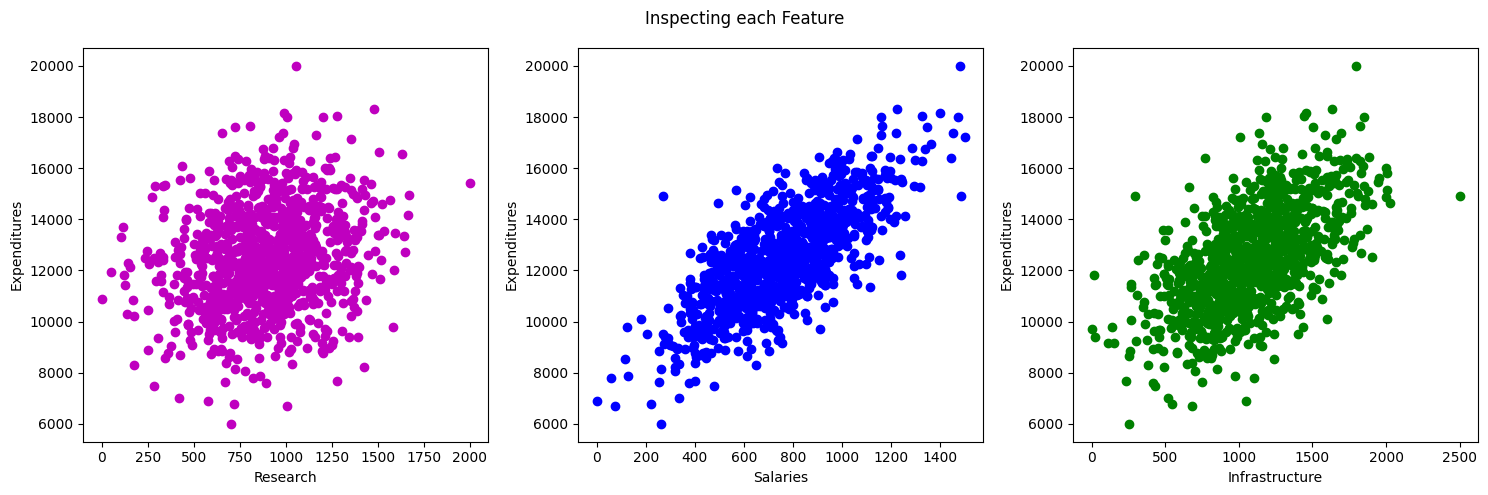

In [27]:
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15, 5))
plt.suptitle("Inspecting each Feature")
axes[0].plot(df['Research'], df['Expenditures'], 'mo')
axes[0].set_ylabel('Expenditures')
axes[0].set_xlabel('Research')
axes[1].plot(df['Salaries'], df['Expenditures'], 'bo')
axes[1].set_ylabel('Expenditures')
axes[1].set_xlabel('Salaries')
axes[2].plot(df['Infrastructure'], df['Expenditures'], 'go')
axes[2].set_ylabel('Expenditures')
axes[2].set_xlabel('Infrastructure')

plt.tight_layout()

- We can conclude that Salaries are highly correlated with expenditures because it shows linear relationship. Then Infrastructure and lastly research.

In [42]:
X = df.iloc[:,:-1]

In [43]:
X

,Research,Salaries,Infrastructure
0,721.857251,613.903942,765.705784
1,469.381222,613.054782,795.516457
2,1077.203847,999.031362,892.341111
3,883.301188,427.943743,935.641612
4,1258.683826,945.261280,1371.053555
...,...,...,...
995,944.144896,662.449234,1699.288797
996,835.747970,637.154467,626.099384
997,1065.151976,646.862827,1433.367330
998,547.326065,900.664293,1179.932777


In [50]:
y = df.iloc[:,-1]

In [51]:
y

,Expenditures
0,10160.329845
1,9906.531892
2,13652.741259
3,9755.080727
4,15239.327596
...,...
995,14085.407676
996,9981.171495
997,13213.698646
998,13274.638267


In [44]:
X = X.values
X

array([[ 721.85725078,  613.90394182,  765.70578445],
       [ 469.3812216 ,  613.05478187,  795.51645662],
       [1077.20384662,  999.03136166,  892.34111134],
       ...,
       [1065.15197636,  646.86282674, 1433.36732978],
       [ 547.32606549,  900.66429282, 1179.93277677],
       [ 600.4082175 ,  454.12205772, 1332.585463  ]])

In [52]:
y = y.values
y

array([10160.32984503,  9906.53189186, 13652.74125895,  9755.08072722,
       15239.32759604, 14034.54974528, 15567.18957247, 10539.85788833,
       10859.35404442, 12847.00713512, 11806.82944175, 14280.00066161,
       12958.38929348, 10227.33024542, 15555.07728417, 15176.3970406 ,
       15195.7179232 , 14483.78923036, 12827.74456071, 11947.18042593,
       13040.7283293 , 15978.27464599, 11900.04033611, 12183.0278213 ,
       10834.83335005, 11613.03371271, 10693.86067724, 11003.65286135,
       15470.12718495, 12897.26616355, 12490.358732  , 10841.28750803,
       10472.82530853,  9523.77854005, 10499.74308119, 13816.05363544,
       10394.39682183, 14267.60478965, 11776.19257846, 10331.67296697,
       11204.9532267 , 10552.65210416, 14318.04193362, 11437.77821453,
       10593.35853894, 16293.42342497, 13631.90196966, 12577.01067394,
       10929.47348209, 12502.24544881,  9380.83054052, 13536.96806088,
       11564.60866625, 18033.28170731,  9784.21294122, 15446.3398107 ,
      

## Train-Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_test.shape

(200, 3)

## Standardize the data

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train

array([[-1.58578602,  0.47584011,  0.26215301],
       [ 0.03839851,  0.02347754,  0.16596997],
       [-0.24857991,  1.79831278,  0.44155313],
       ...,
       [ 0.51462183, -0.23568021,  1.65042511],
       [-0.76912267,  0.3013089 ,  0.17449638],
       [ 1.37701692, -1.22871643,  0.29965884]])

## Apply Linear Regression

In [57]:
lr = LinearRegression()

In [59]:
lr.fit(X_train, y_train)
print(f"The intercept for our model is {lr.intercept_.round(2)}")
print(f"The coefficients for our model are {lr.coef_.round(2)}")

The intercept for our model is 12483.45
The coefficients for our model are [ 409.54 1557.34 1229.12]


## Testing and Evaluating

In [60]:
y_pred = lr.predict(X_test)

In [66]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

RMSE: 2.2025926297487487e-12
MAE: 1.659827830735594e-12
R2: 1.0
